# **Homework 1 on toy dataset "wine" from sklearn**
# Data
The data was collected from 3 different cultivators from the same region in Italy. Every cultivator produces 3 types of wine. Every sample of wine was chemically tested on 13 different ingredients. 
# Target
The target is to clasiffy type of wine by looking into the ingredients.


# Loading Data

In [43]:
from sklearn.datasets import load_wine

Checking if data is accessible.

In [44]:
loaded = load_wine(as_frame=True)
X = loaded['data']
Y = loaded['target']
print(X.columns)
print(Y)
print("size =", X.shape)

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')
0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64
size = (178, 13)


# Data Inspection

 Summary of features.

In [45]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Looking into distribution.

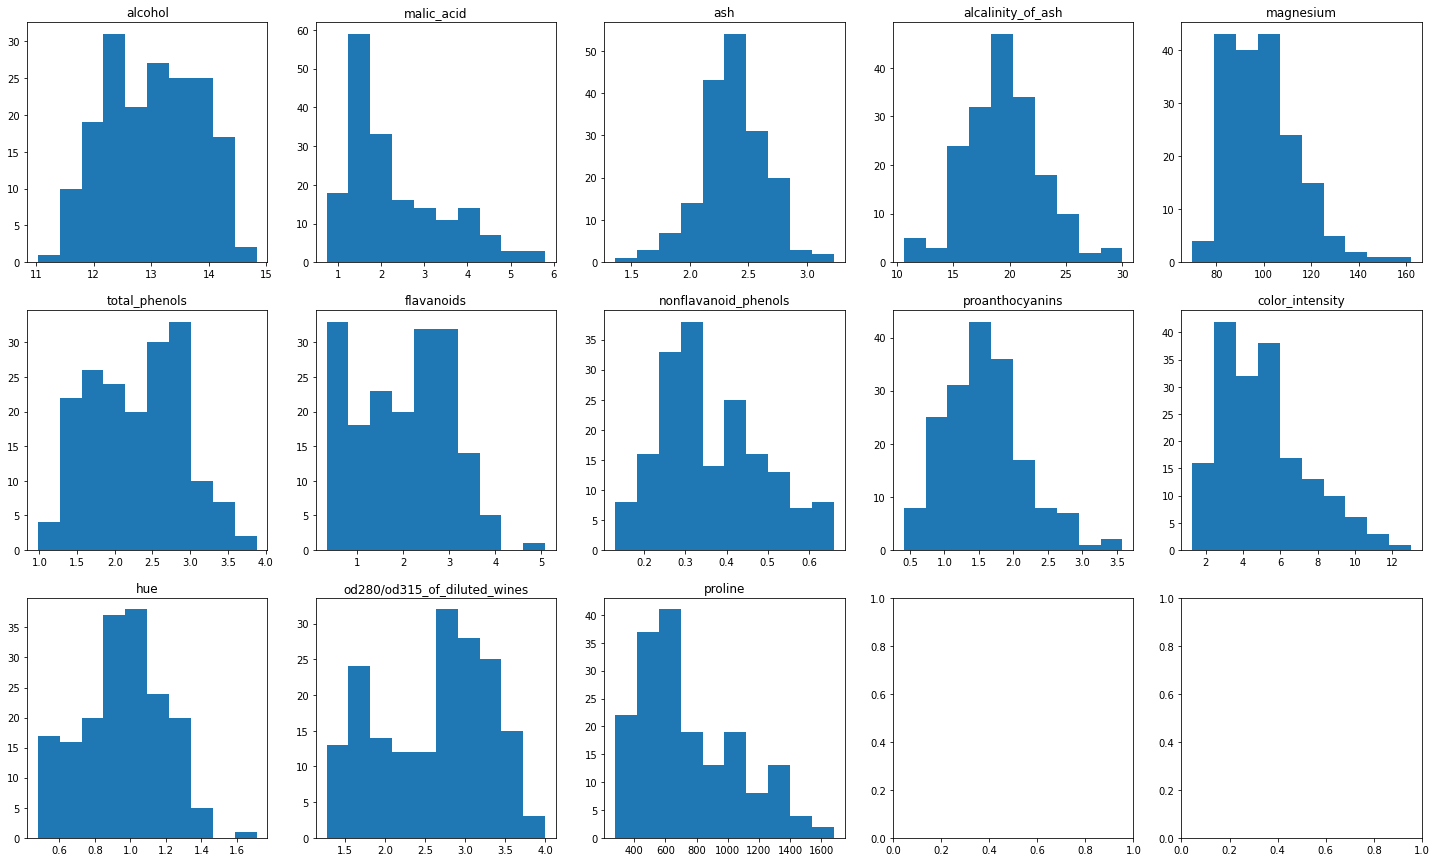

In [46]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 5, figsize=(25,15))
for (num, column) in zip(range(13), X.columns):
  x = num // 5
  y = num % 5
  axs[x, y].hist(X[column])
  axs[x, y].set_title(column)

Checking if the data is complete.

In [47]:
def check_nulls(data):
  for column in data.columns:
    for item in column:
      if item is None:
        return 'There are nulls in dataset!!!'
  return 'No nulls in dataset.'

print(check_nulls(X))

No nulls in dataset.


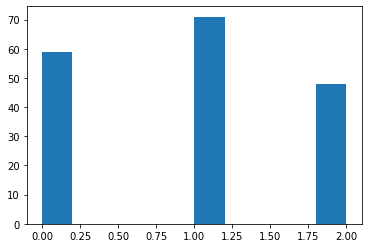

In [48]:
plt.hist(Y)
plt.show()

# Fitting models


I will now use cross validation to select best model out of 3. 

In [49]:
# Here I used code from here https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


models = []
models.append(('LR', LogisticRegression(max_iter=4000)))
models.append(('RFC', RandomForestClassifier(random_state=1)))
models.append(('GBC', GradientBoostingClassifier(random_state=2)))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=5, random_state=4, shuffle=True)
  cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print("Results =", cv_results)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg, '\n')

Results = [0.97222222 0.91666667 0.97222222 0.91428571 1.        ]
LR: 0.955079 (0.033898) 

Results = [1.         0.94444444 1.         0.97142857 1.        ]
RFC: 0.983175 (0.022304) 

Results = [1.         0.86111111 0.91666667 0.91428571 0.91428571]
GBC: 0.921270 (0.044579) 



# Analysys

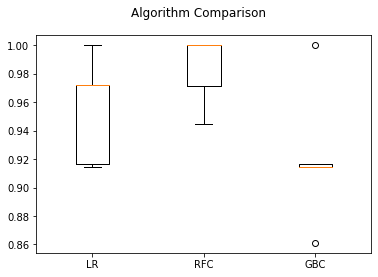

In [50]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Comparing all 3 models, we can see that all of them are pretty good (95%), but they differ a bit. GBC is the worst, its average score is the lowest and the results vary from 0.86 to 1.0. LR and RFC are more promising. The LR model average score is 0.955, which is good but it could be done better. The RFC model seems the best and has a average score of 0.983, also its results are in a narrow range between 0.94 and 1.0.

The RFC and GBC depend on 'random_state' and may achieve different results.

When we split the data (178 rows) in 5 parts the train dataset consist of about 140 rows and test dataset of about 35 rows. This is not much.

# Working with best model

The dataset is a bit small so I will test the model many times on randomly choosen train-test split and take mean.

In [51]:
from sklearn.model_selection import train_test_split
import numpy as np

results = []

for i in range(50):
  x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=i, test_size=0.15)
  rfc = RandomForestClassifier(random_state=5).fit(x_train, y_train)
  rfc_res = rfc.score(x_test, y_test)
  results.append(rfc_res)

print("Mean =", np.array(results).mean())

Mean = 0.982222222222222


# Ending thoughts

Testing this 3 models the best one seems to be "Random Forest Classifier". All of the models reach mean accuracy of at least 92%, which is pretty high. The biggest problem is that the data only has 178 rows. This make whole proccess of work unstable. Single rows have big impact on learning and testing the model. So if there are some rows with errors it affects whole model. After selecting best model and training it seems that it works perfectly reaching accuracy of 98%.